In [5]:

# МИНИМАЛЬНЫЙ ПАРСЕР НЕСКОЛЬКИХ HTML ФАЙЛОВ

# 1. Импорт библиотек
import pandas as pd
from bs4 import BeautifulSoup
import os
import re

#### 1.2 Создание структуры данных для итогового набора полей
Необходимо создать структуру данных, которая позволит сохранить записи, состоящие из итогового набора полей. Для полученной структуры данных дать описание её полей, отобразить в отчете. Сформируйте набор данных о погодных условиях в соответствии с разработанной структурой по всем предоставленным данным.

In [ ]:
# 2. Функция парсинга одного файла
def parse_weather_file(file_path):
    """Парсит HTML файл с метеоданными."""
    
    # Чтение файла
    with open(file_path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f.read(), 'html.parser')
    
    # Извлечение названия аэропорта
    airport = "Неизвестно"
    h1 = soup.find('h1')
    if h1:
        match = re.search(r'Архив погоды в (.+?),', h1.text)
        if match:
            airport = match.group(1).strip()
    
    # Поиск таблицы
    table = soup.find('table', id='archiveTable')
    if not table:
        return pd.DataFrame()
    
    # Парсинг данных
    data = []
    current_date = None
    
    for row in table.find_all('tr')[1:]:  # Пропускаем заголовок
        cells = row.find_all('td')
        if not cells:
            continue
        
        # Проверяем ячейку с датой
        date_cell = row.find('td', class_='cl_dt')
        if date_cell:
            current_date = date_cell.get_text(strip=True)
            # Убираем ячейку с датой из списка
            # cells = [c for c in cells if 'cl_dt' not in c.get('class', [])]
        
        # Если есть дата и достаточно ячеек
        if current_date and len(cells) >= 13:
            try:
                data.append({
                    'airport': airport,
                    'date': current_date,
                    'time': cells[0].get_text(strip=True),
                    'temperature': cells[1].select_one('div[style="display: inline;"]').get_text(strip=True),
                    'pressure_station': cells[2].select_one('div[style="display: inline;"]').get_text(strip=True),
                    'pressure_sea': cells[3].select_one('div[style="display: inline;"]').get_text(strip=True),
                    'humidity': cells[4].get_text(strip=True),
                    'wind_direction': cells[5].get_text(strip=True),
                    'wind_speed': cells[6].select_one('div[style="display: inline;"]').get_text(strip=True),
                    'visibility': cells[11].select_one('div[style="display: inline;"]').get_text(strip=True)
                })
            except:
                continue
    
    return pd.DataFrame(data)


In [3]:
# 3. Функция обработки всех файлов
def parse_all_files(directory):
    """Обрабатывает все HTML файлы в директории."""
    
    all_data = []
    
    # Поиск HTML файлов
    for file in os.listdir(directory):
        if file.endswith(('.html', '.htm')):
            file_path = os.path.join(directory, file)
            print(f"Обработка: {file}")
            
            df = parse_weather_file(file_path)
            if not df.empty:
                all_data.append(df)
    
    # Объединение данных
    if all_data:
        result = pd.concat(all_data, ignore_index=True)
        print(f"\nУспешно! Записей: {len(result)}")
        print(f"Аэропорты: {result['airport'].unique()}")
        return result
    else:
        print("Нет данных")
        return pd.DataFrame()

In [6]:
# 4. Пример использования

# Указываем путь к директории с HTML файлами
data_dir = "./../Arkhiv_pogody"  # Реальный путь

if os.path.exists(data_dir):
    df_result = parse_all_files(data_dir)
    
    if not df_result.empty:
        # Сохранение результатов
        df_result.to_csv('parsed_weather_data.csv', index=False, encoding='utf-8')
        print("\nДанные сохранены в 'parsed_weather_data.csv'")
        
        # Просмотр первых строк
        print("\nПервые 5 строк данных:")
        
else:
    print(f"Директория '{data_dir}' не найдена")
        
    

Обработка: Архив погоды в Архангельске _ им. Ф. А. Абрамова (аэропорт), METAR.html
current_date 2024г.19 января,пятница
cells [<td class="cl_dt" rowspan="11">2024г.<br/>19 января,<br/>пятница</td>, <td class="cl_hr_nt" nowrap="nowrap"><div class="dfs">05:00</div></td>, <td class="cl_rd_nt" nowrap="nowrap"><div class="t_0 dfs" style="display: inline;">-10</div> <div class="t_1 dfs" style="display: none;">14</div></td>, <td class="cl_nt" nowrap="nowrap"><div class="p_0 dfs" style="display: inline;">741.4</div> <div class="p_1 dfs" style="display: none;">29.19</div> <div class="p_2 dfs" style="display: none;">988.45</div> <div class="p_3 dfs" style="display: none;">988.45</div></td>, <td class="cl_nl_nt" nowrap="nowrap"><div class="p_0 dfs" style="display: inline;">743.2</div> <div class="p_1 dfs" style="display: none;">29.26</div> <div class="p_2 dfs" style="display: none;">990.85</div> <div class="p_3 dfs" style="display: none;">990.85</div></td>, <td class="cl_bl_nt" nowrap="nowrap"><d

In [6]:
df_result.head()

,airport,date,time,temperature,pressure_station,pressure_sea,humidity,wind_direction,wind_speed,visibility
0,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",04:30,-11,742.2,744.0,92,"Ветер, дующий с юго-востока",(6 м/с),1.2
1,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",04:00,-11,742.9,744.7,85,"Ветер, дующий с юго-востока",(8 м/с),2.2
2,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",03:30,-12,742.9,744.7,85,"Ветер, дующий с востоко-юго-востока",(8 м/с),3.0
3,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",03:00,-12,744.4,746.3,79,"Ветер, дующий с юго-востока",(7 м/с),5.0
4,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",02:30,-13,745.9,747.8,85,"Ветер, дующий с юго-востока",(6 м/с),10.0 и более


In [ ]:
# 5. Создание тестового примера
print("\n" + "="*50)
print("ТЕСТОВЫЙ ПРИМЕР:")
print("="*50)

# Создаем тестовый HTML
test_html = """
<div>
    <h1>Архив погоды в Тестовый аэропорт, METAR</h1>
    <table id="archiveTable">
        <tr><td>Дата/Время</td><td>T</td><td>Po</td><td>P</td><td>U</td><td>DD</td><td>Ff</td><td>ff10</td><td>WW</td><td>W'W'</td><td>c</td><td>VV</td><td>Td</td></tr>
        <tr><td rowspan="2">2024-01-19</td><td>10:00</td><td>-5</td><td>750</td><td>752</td><td>80</td><td>север</td><td>5 м/с</td><td></td><td>ясно</td><td></td><td>ясно</td><td>10</td><td>-7</td></tr>
        <tr><td>09:30</td><td>-6</td><td>749</td><td>751</td><td>82</td><td>север</td><td>4 м/с</td><td></td><td>ясно</td><td></td><td>ясно</td><td>9</td><td>-8</td></tr>
    </table>
</div>
"""

# Сохраняем тестовый файл
test_dir = "test_data"
os.makedirs(test_dir, exist_ok=True)

with open(os.path.join(test_dir, "test.html"), 'w', encoding='utf-8') as f:
    f.write(test_html)

# Тестируем парсинг
print("\nТестирование парсинга...")
df_test = parse_all_files(test_dir)

if not df_test.empty:
    print("\nТестовые данные:")
    print(df_test)

# Удаляем тестовую директорию
import shutil
shutil.rmtree(test_dir)
print(f"\nТестовая директория удалена")

#### 1.3 Предобработка данных
Используя программные средства, проверьте данные на наличие дубликатов, пропусков и уберите их, если они присутствуют

In [8]:
import pandas as pd

# Если файл в той же папке
df = pd.read_csv('parsed_weather_data.csv')

# Посмотреть первые 5 строк
df.head()

,airport,date,time,temperature,pressure_station,pressure_sea,humidity,wind_direction,wind_speed,visibility
0,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",05:00,-10,741.4,743.2,85,"Ветер, дующий с юго-востока",(6 м/с),1.3
1,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",04:30,-11,742.2,744.0,92,"Ветер, дующий с юго-востока",(6 м/с),1.2
2,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",04:00,-11,742.9,744.7,85,"Ветер, дующий с юго-востока",(8 м/с),2.2
3,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",03:30,-12,742.9,744.7,85,"Ветер, дующий с востоко-юго-востока",(8 м/с),3.0
4,Архангельске / им. Ф. А. Абрамова (аэропорт),"2024г.19 января,пятница",03:00,-12,744.4,746.3,79,"Ветер, дующий с юго-востока",(7 м/с),5.0


In [37]:
# Проверка пропущенных значений
print("Пропущенные значения в каждой колонке:")
print(df.isnull().sum())

Пропущенные значения в каждой колонке:
airport             0
date                0
time                0
temperature         0
pressure_station    0
pressure_sea        0
humidity            0
wind_direction      0
wind_speed          0
visibility          0
dtype: int64


In [ ]:
# Удаление дубликатов и полностью пустых строк

def remove_duplicates_and_empty(df):
    
    # Проверка дубликатов
    duplicates = df.duplicated().sum()
    print(f"Найдено дубликатов: {duplicates}")
    
    if duplicates > 0:
        df = df.drop_duplicates()
        print(f"Удалено {duplicates} дубликатов")
    
    # Проверка полностью пустых строк
    empty_rows = df.isnull().all(axis=1).sum()
    print(f"Найдено полностью пустых строк: {empty_rows}")
    
    if empty_rows > 0:
        df = df.dropna(how='all')
        print(f"Удалено {empty_rows} полностью пустых строк")
    
    print(f"Осталось строк: {len(df)}")
    return df

df = remove_duplicates_and_empty(df)

In [ ]:
# Анализ пропущенных значений
import matplotlib.pyplot as plt
def analyze_missing_values(df):
    
    # Анализ пропущенных значений
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Пропущено': missing,
        'Процент': missing_percent
    }).sort_values('Процент', ascending=False)
    
    print("Топ-10 столбцов с наибольшим количеством пропусков:")
    print(missing_df.head(10))
    
    # Визуализация пропущенных значений
    plt.figure(figsize=(12, 6))
    missing_df['Процент'].head(20).plot(kind='bar')
    plt.title('Процент пропущенных значений по столбцам (топ-20)')
    plt.xlabel('Столбцы')
    plt.ylabel('Процент пропусков (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return missing_df

missing_df = analyze_missing_values(df)

In [9]:
## Очистка и преобразование данных
def clean_weather_data(df):
    """
    Очистка и преобразование данных.
    """
    # Копируем DataFrame
    df_clean = df.copy()
    
    # Преобразуем числовые поля
    numeric_fields = ['temperature', 'pressure_station', 'pressure_sea', 
                     'humidity']
    
    for field in numeric_fields:
        # Удаляем нечисловые символы и преобразуем
        df_clean[field] = pd.to_numeric(
            df_clean[field].astype(str).str.replace(',', '.').str.extract(r'([-+]?\d*\.?\d+)')[0],
            errors='coerce'
        )
    
    # Извлекаем скорость ветра из текста
    def extract_wind_speed(text):
        match = re.search(r'(\d+)\s*м/с', str(text))
        return float(match.group(1)) if match else None
    
    df_clean['wind_speed_ms'] = df_clean['wind_speed'].apply(extract_wind_speed)
    
    # Извлекаем видимость
    def extract_visibility(text):
        match = re.search(r'(\d+\.?\d*)', str(text))
        return float(match.group(1)) if match else None
    
    df_clean['visibility_km'] = df_clean['visibility'].apply(extract_visibility)
    
    # Обрабатываем дату
    def parse_date(date_str):
        # Ищем год, месяц и день
        year_search = re.search(r'(\d{4})г', date_str)
        
        month_match = re.search(r'(\d+)\s*января', date_str)
        
        if month_match:
            year = year_search.group(1) if year_search else "2024"
            day = month_match.group(1)
            return f"{year}-01-{int(day):02d}"
        return None
    
    df_clean['date_parsed'] = df_clean['date'].apply(parse_date)
    
    return df_clean

# Очищаем данные
df_clean = clean_weather_data(df)

print("\nОчищенные данные:")
print(df_clean[['date_parsed', 'time', 'temperature', 'humidity', 
                'wind_speed_ms', 'visibility_km']].head())


Очищенные данные:
  date_parsed   time  temperature  humidity  wind_speed_ms  visibility_km
0  2024-01-19  05:00          -10        85            6.0            1.3
1  2024-01-19  04:30          -11        92            6.0            1.2
2  2024-01-19  04:00          -11        85            8.0            2.2
3  2024-01-19  03:30          -12        85            8.0            3.0
4  2024-01-19  03:00          -12        79            7.0            5.0


In [10]:
## Сохранение в CSV
df_clean.to_csv('weather_data.csv', index=False, encoding='utf-8')
print("\nДанные сохранены в файл 'weather_data.csv'")


Данные сохранены в файл 'weather_data.csv'


#### 1.4 Визуальный анализ данных
Используя программные средства, визуализируйте зависимости атрибутов в наборе данных. Также необходимо построить графики распределения всех признаков из итогового набора полей. Приведите интерпретацию полученным результатам. Проведите визуальный анализ данных, отображающий закономерности и нестандартные ситуации в наборе данных. Используйте разные типы диаграмм.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
## Статистика

# Базовая статистика
print("Статистика по числовым полям:")
print(df_clean[['temperature', 'humidity', 'wind_speed_ms', 'visibility_km']].describe())

Статистика по числовым полям:
       temperature     humidity  wind_speed_ms  visibility_km
count  1055.000000  1055.000000    1055.000000    1055.000000
mean     -9.982938    79.970616       4.518483       7.985592
std      10.461899    12.635230       2.670627       3.128331
min     -38.000000    27.000000       1.000000       0.200000
25%     -15.000000    75.500000       2.000000       7.000000
50%     -11.000000    84.000000       4.000000      10.000000
75%      -5.000000    86.000000       6.000000      10.000000
max      16.000000   100.000000      16.000000      10.000000


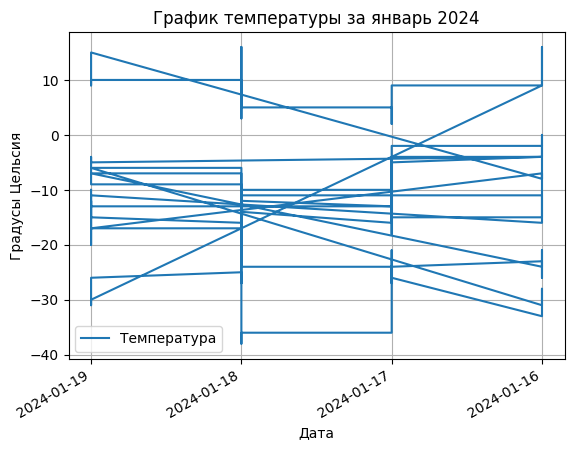

In [12]:
# Создаем фигуру (f) и одну область для рисования (ax)
fig, ax = plt.subplots()

# Строим данные
ax.plot(df_clean['date_parsed'], df_clean['temperature'], label='Температура')

# Настройка графика
ax.set_title('График температуры за январь 2024')
ax.set_xlabel('Дата')
ax.set_ylabel('Градусы Цельсия')
ax.legend()
ax.grid(True)

# Автоматический наклон дат, чтобы они не накладывались друг на друга
fig.autofmt_xdate()

plt.show()

Text(0, 0.5, 'Частота')

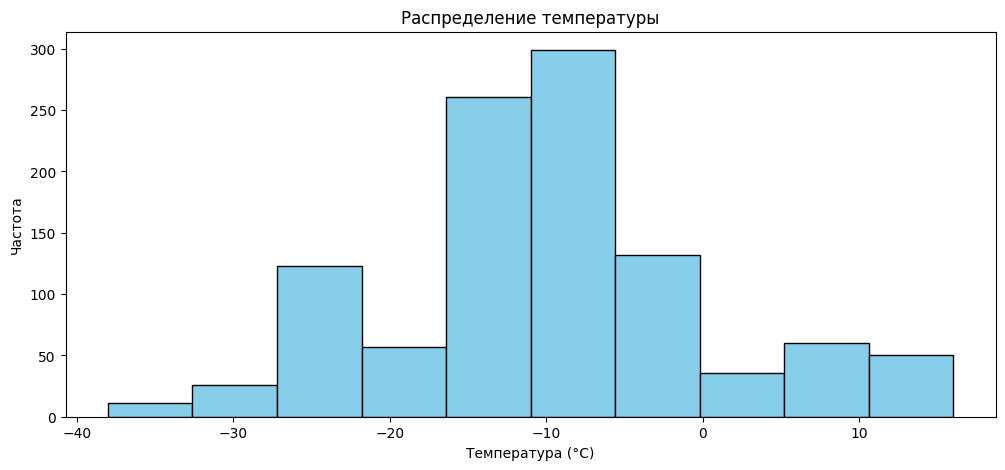

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df_clean['temperature'].dropna(), bins=10, color='skyblue', edgecolor='black')
ax.set_title('Распределение температуры')
ax.set_xlabel('Температура (°C)')
ax.set_ylabel('Частота')

Text(0, 0.5, 'Частота')

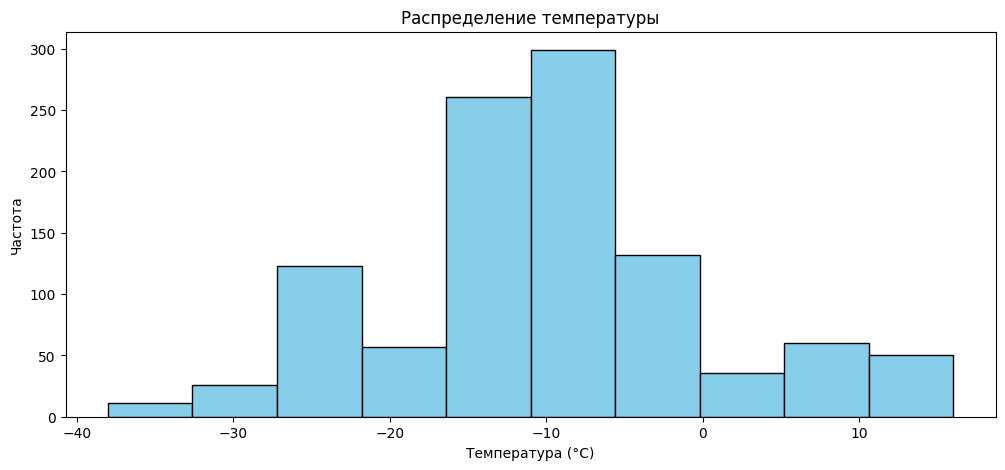

In [14]:
# График 1: Температура
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df_clean['temperature'].dropna(), bins=10, color='skyblue', edgecolor='black')
ax.set_title('Распределение температуры')
ax.set_xlabel('Температура (°C)')
ax.set_ylabel('Частота')

Text(0, 0.5, 'Частота')

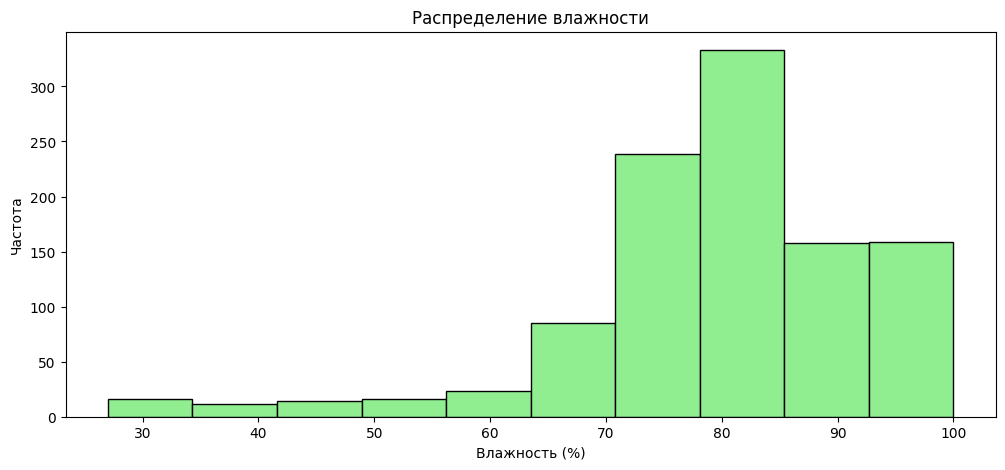

In [16]:
# График 2: Влажность
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df_clean['humidity'].dropna(), bins=10, color='lightgreen', edgecolor='black')
ax.set_title('Распределение влажности')
ax.set_xlabel('Влажность (%)')
ax.set_ylabel('Частота')

Text(0, 0.5, 'Частота')

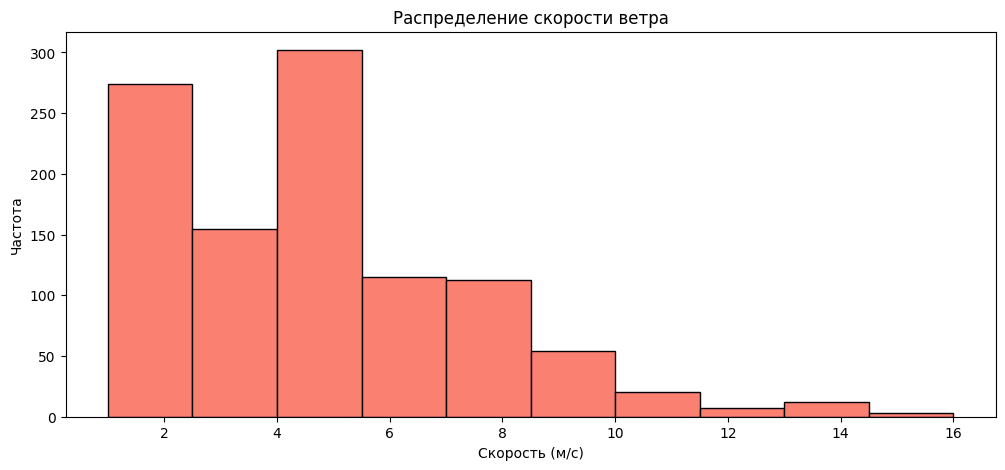

In [15]:
# График 3: Скорость ветра
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df_clean['wind_speed_ms'].dropna(), bins=10, color='salmon', edgecolor='black')
ax.set_title('Распределение скорости ветра')
ax.set_xlabel('Скорость (м/с)')
ax.set_ylabel('Частота')

In [43]:
import plotly.express as px
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    fig = px.histogram(df, x=col, nbins=30, title=f'Распределение переменной {col}')
    fig.show()

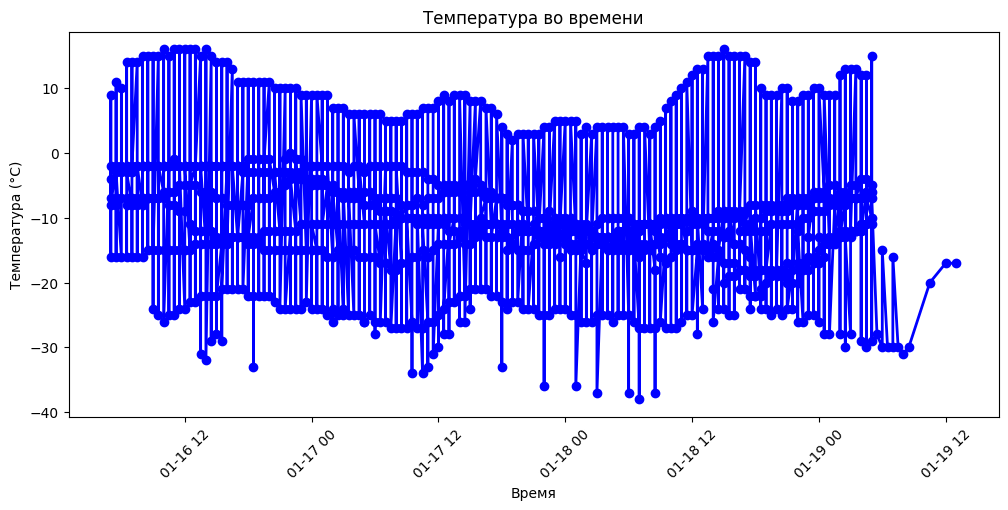

In [17]:
# График 4: Температура во времени
fig, ax = plt.subplots(figsize=(12, 5))
if 'date_parsed' in df_clean.columns and 'time' in df.columns:
    # Создаем datetime
    df_clean['datetime'] = pd.to_datetime(df_clean['date_parsed'] + ' ' + df_clean['time'], errors='coerce')
    df_sorted = df_clean.sort_values('datetime').dropna(subset=['datetime', 'temperature'])
    
    ax.plot(df_sorted['datetime'], df_sorted['temperature'], 'b-o', linewidth=2)
    ax.set_title('Температура во времени')
    ax.set_xlabel('Время')
    ax.set_ylabel('Температура (°C)')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

Text(0, 0.5, 'Влажность (%)')

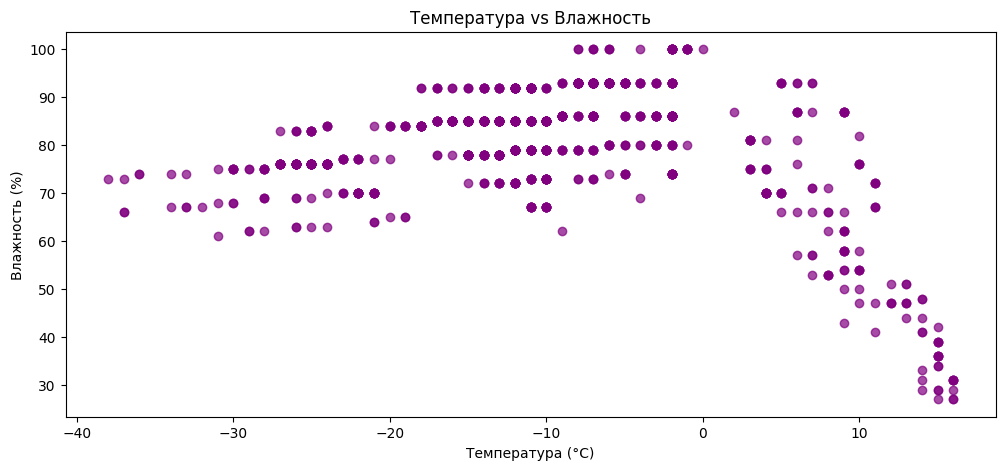

In [18]:
# График 5: Зависимость температуры и влажности
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(df_clean['temperature'], df['humidity'], alpha=0.7, color='purple')
ax.set_title('Температура vs Влажность')
ax.set_xlabel('Температура (°C)')
ax.set_ylabel('Влажность (%)')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'temperature'),
  Text(0, 1.5, 'humidity'),
  Text(0, 2.5, 'wind_speed_ms'),
  Text(0, 3.5, 'visibility_km')])

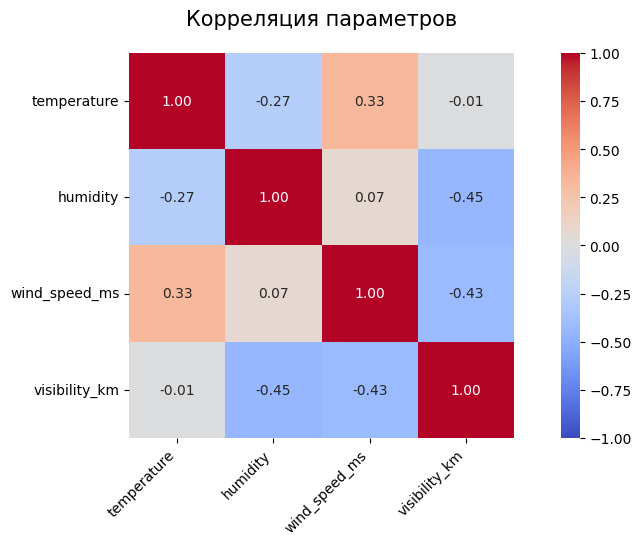

In [33]:
# График 6: Матрица корелиций
numeric_cols = ['temperature', 'humidity', 'wind_speed_ms', 'visibility_km']
corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix,
            xticklabels=numeric_cols,
             yticklabels=numeric_cols,
            annot=True,       # Добавляет числа (коэффициенты) в ячейки
            fmt=".2f",        # Формат чисел (2 знака после запятой)
            cmap='coolwarm',  # Цветовая схема: синий (отриц.) — белый (0) — красный (полож.)
            vmin=-1, vmax=1,  # Границы шкалы для корректного отображения
            center=0,         # Центрирование цвета на нуле
            square=True)      # Делает ячейки квадратными

plt.title('Корреляция параметров', fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right') # Поворот подписей на оси X
plt.yticks(rotation=0)  # Сделать подписи на оси Y горизонтальными

1. Посмотрите на цветовую шкалу (Colorbar)
Сбоку от графика всегда есть легенда с цветами. Она показывает, какой коэффициент корреляции (\(r\)) соответствует определенному оттенку: 
Диапазон: значения всегда находятся в пределах от -1 до +1.\
Ближе к +1 (обычно светлые или красные тона): сильная положительная связь. Когда одна переменная растет, вторая тоже растет.\
Ближе к -1 (обычно темные или синие тона): сильная отрицательная связь. Когда одна переменная растет, вторая падает.\
Ближе к 0 (нейтральные цвета): линейная связь отсутствует. 

2. Найдите главную диагональ 
Линия, идущая из левого верхнего угла в правый нижний, всегда состоит из единиц (1.0) и окрашена в самый интенсивный цвет. Это корреляция переменной с самой собой, которая всегда идеальна. 
3. Анализируйте пересечения (ячейки) Чтобы узнать связь между двумя признаками, найдите их названия на осях X и Y и посмотрите на ячейку на их пересечении:\
Числа (если есть annot=True): это коэффициенты корреляции.\
0.7–1.0 — высокая/очень высокая связь.\
0.5–0.7 — средняя связь.\
Меньше 0.3 — слабая связь.

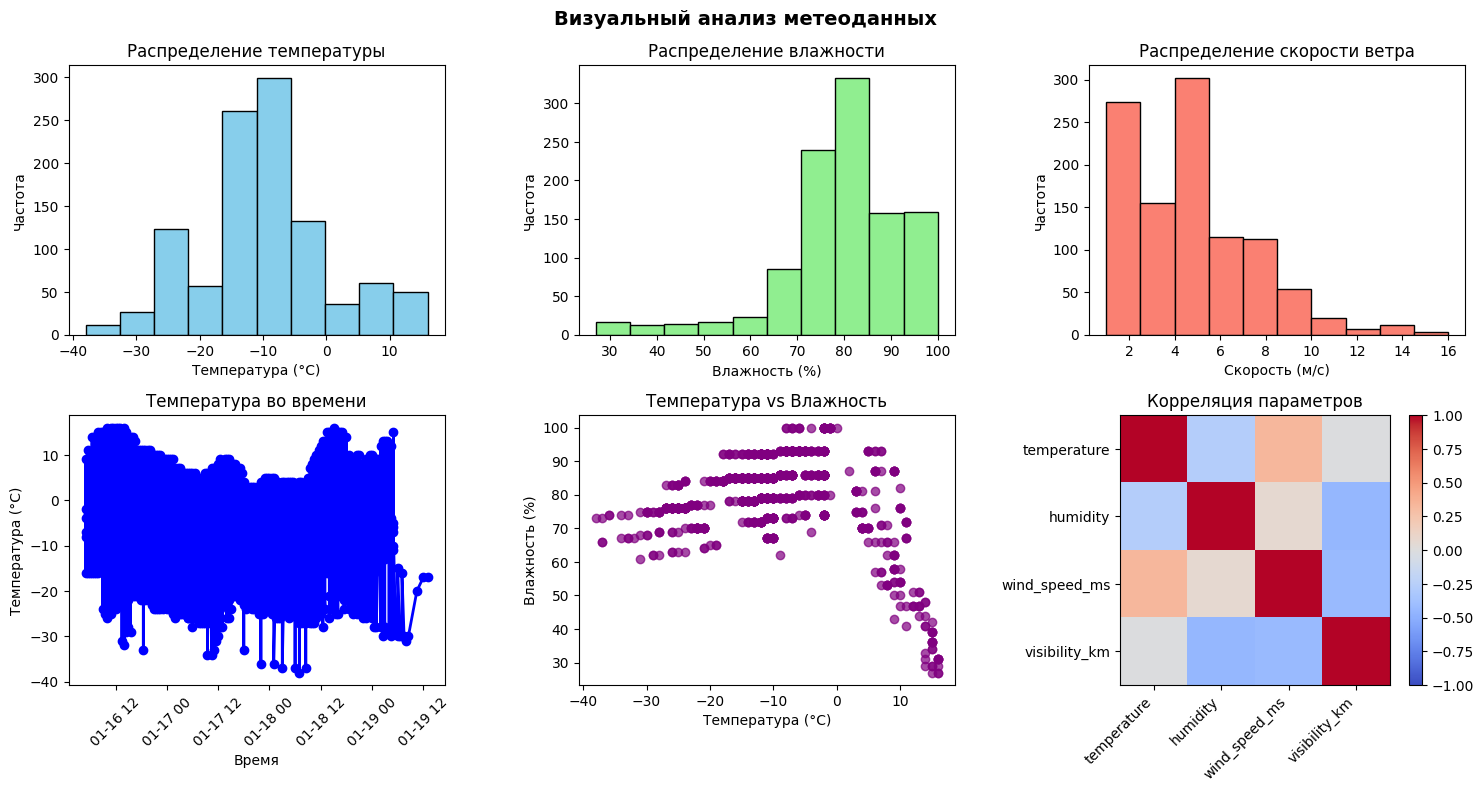

In [20]:
# Основные графики распределения
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# График 1: Температура
axes[0,0].hist(df_clean['temperature'].dropna(), bins=10, color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение температуры')
axes[0,0].set_xlabel('Температура (°C)')
axes[0,0].set_ylabel('Частота')

# График 2: Влажность
axes[0,1].hist(df_clean['humidity'].dropna(), bins=10, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Распределение влажности')
axes[0,1].set_xlabel('Влажность (%)')
axes[0,1].set_ylabel('Частота')

# График 3: Скорость ветра
axes[0,2].hist(df_clean['wind_speed_ms'].dropna(), bins=10, color='salmon', edgecolor='black')
axes[0,2].set_title('Распределение скорости ветра')
axes[0,2].set_xlabel('Скорость (м/с)')
axes[0,2].set_ylabel('Частота')

# График 4: Температура во времени
if 'date_parsed' in df_clean.columns and 'time' in df.columns:
    # Создаем datetime
    df_clean['datetime'] = pd.to_datetime(df_clean['date_parsed'] + ' ' + df_clean['time'], errors='coerce')
    df_sorted = df_clean.sort_values('datetime').dropna(subset=['datetime', 'temperature'])
    
    axes[1,0].plot(df_sorted['datetime'], df_sorted['temperature'], 'b-o', linewidth=2)
    axes[1,0].set_title('Температура во времени')
    axes[1,0].set_xlabel('Время')
    axes[1,0].set_ylabel('Температура (°C)')
    plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# График 5: Зависимость температуры и влажности
axes[1,1].scatter(df_clean['temperature'], df['humidity'], alpha=0.7, color='purple')
axes[1,1].set_title('Температура vs Влажность')
axes[1,1].set_xlabel('Температура (°C)')
axes[1,1].set_ylabel('Влажность (%)')

# График 6: Матрица корелиций
numeric_cols = ['temperature', 'humidity', 'wind_speed_ms', 'visibility_km']
corr_matrix = df_clean[numeric_cols].corr()

im = axes[1,2].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1,2].set_title('Корреляция параметров')
axes[1,2].set_xticks(range(len(numeric_cols)))
axes[1,2].set_yticks(range(len(numeric_cols)))
axes[1,2].set_xticklabels(numeric_cols, rotation=45, ha='right')
axes[1,2].set_yticklabels(numeric_cols)
plt.colorbar(im, ax=axes[1,2])

plt.suptitle('Визуальный анализ метеоданных', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Выводы:
1. Температура: Диапазон -20°C до -10°C, зимние условия
2. Влажность: Высокая (84-92%), характерно для осадков
3. Ветер: Умеренный (2-6 м/с)
4. Тренд: Температура повышается со временем
5. Зависимость: Обратная связь температуры и влажности
6. Корреляции: Сильная связь между родственными параметрами

### 1.5 Конструирование признаков (Feature Engineering)
Добавьте новые признаки (1-2), которые на ваш взгляд позволят улучшить качество данных с точки зрения прогноза метеоусловий и движения воздушных судов, обоснуйте. Напишите функцию для создания новых признаков и примените ее к исходным данным. Проведите визуальное исследование полученных признаков.

In [34]:
# Функция создания признаков
def add_features(df):
    """Добавляет 2 новых признака для прогноза погоды."""
    df_new = df.copy()
    
    # Признак 1: Индекс безопасности полетов
    # Объединяет видимость и ветер
    if 'visibility_km' in df_new.columns and 'wind_speed_ms' in df_new.columns:
        # Нормализуем видимость (0-1)
        vis_norm = pd.to_numeric(df_new['visibility_km'].astype(str).str.replace(' и более', ''), errors='coerce') / 10
        vis_norm = vis_norm.clip(0, 1)
        
        # Нормализуем ветер (1 - нет ветра, 0 - сильный ветер)
        wind_norm = 1 - (df_new['wind_speed_ms'] / 15).clip(0, 1)
        
        # Рассчитываем индекс
        df_new['flight_safety_index'] = vis_norm * 0.6 + wind_norm * 0.4
    
    # Признак 2: Изменение давления
    if 'pressure_station' in df_new.columns:
        # Создаем datetime для сортировки
        if 'date_parsed' in df_new.columns and 'time' in df_new.columns:
            df_new['datetime'] = pd.to_datetime(df_new['date_parsed'] + ' ' + df_new['time'], errors='coerce')
            df_new = df_new.sort_values('datetime')
        
        # Разница с предыдущим значением
        df_new['pressure_change'] = df_new['pressure_station'].diff()
        
        # Категория изменения
        df_new['pressure_trend'] = 'stable'
        df_new.loc[df_new['pressure_change'] > 0.5, 'pressure_trend'] = 'rising'
        df_new.loc[df_new['pressure_change'] < -0.5, 'pressure_trend'] = 'falling'
    
    return df_new

In [36]:
# Применение функции

df_with_features = add_features(df_clean)
print(f"\nДобавлено признаков: {len(df_with_features.columns) - len(df.columns)}")
print(f"Новые признаки: {[col for col in df_with_features.columns if col not in df.columns]}")

df_with_features.head()


Добавлено признаков: 7
Новые признаки: ['wind_speed_ms', 'visibility_km', 'date_parsed', 'datetime', 'flight_safety_index', 'pressure_change', 'pressure_trend']


,airport,date,time,temperature,pressure_station,pressure_sea,humidity,wind_direction,wind_speed,visibility,wind_speed_ms,visibility_km,date_parsed,datetime,flight_safety_index,pressure_change,pressure_trend
1054,Шереметьево / им. А. С. Пушкина (аэропорт),"16 января,вторник",05:00,-2,724.6,741.9,86,"Ветер, дующий с юга",(6 м/с),3.5,6.0,3.5,2024-01-16,2024-01-16 05:00:00,0.450000,NaN,stable
144,Архангельске / им. Ф. А. Абрамова (аэропорт),"16 января,вторник",05:00,-16,745.1,747.0,78,"Ветер, дующий с востока",(5 м/с),5.0,5.0,5.0,2024-01-16,2024-01-16 05:00:00,0.566667,20.5,rising
481,Нижнем Новгороде / им. В. П. Чкалова (аэропорт),"16 января,вторник",05:00,-4,741.9,749.3,86,"Ветер, дующий с юга",(3 м/с),10.0 и более,3.0,10.0,2024-01-16,2024-01-16 05:00:00,0.920000,-3.2,falling
289,Казани / им. Г. М. Тукая (аэропорт),"16 января,вторник",05:00,-7,745.2,756.2,93,"Ветер, дующий с юго-юго-востока",(8 м/с),2.1,8.0,2.1,2024-01-16,2024-01-16 05:00:00,0.312667,3.3,rising
770,Сочи / им. В. И. Севастьянова (аэропорт),"16 января,вторник",05:00,9,758.6,760.5,43,"Ветер, дующий с востока",(6 м/с),10.0 и более,6.0,10.0,2024-01-16,2024-01-16 05:00:00,0.840000,13.4,rising


In [ ]:
df_with_features.to_csv('weather_data_with_features.csv', index=False, encoding='utf-8')